- 현재 **ML에서 주로 사용되는 SVM, RF, Boosting Machine** 등을 활용하여 간단한 NLP Task를 해결할 수 있지만 **복잡한 문제를 해결하기에는 한계가 있음**. 따라서 기본적으로 **네트워크 모델**을 이용하여 NLP 문제를 해결하는 것이 **일반적**.
- 여기에서는 **RNN과 Layer**들의 간단한 구조를 살펴볼 것.

### 1. RNN
- (ex) "나는 오늘 스파게티를 먹었는데 그것은 매우 맛있었어."
- 여기서, **"그것"**은 무엇을 의미하며 우리는 어떻게 **"스파게티"**인 것을 알 수 있을까? 우리의 뇌는 문장을 읽어가면서 그동안 읽은 정보들을 활용하여 문장을 읽어나감. 따라서 **t 시점의 단어를 온전히 이해하기 위해서는 t-1번째까지의 정보를 포함하여야 함.** 일반적인 ML 모델이 NLP에 좋지 못한 성능을 보이는 것도 이러한 이유 때문.
- <RNN의 구조>

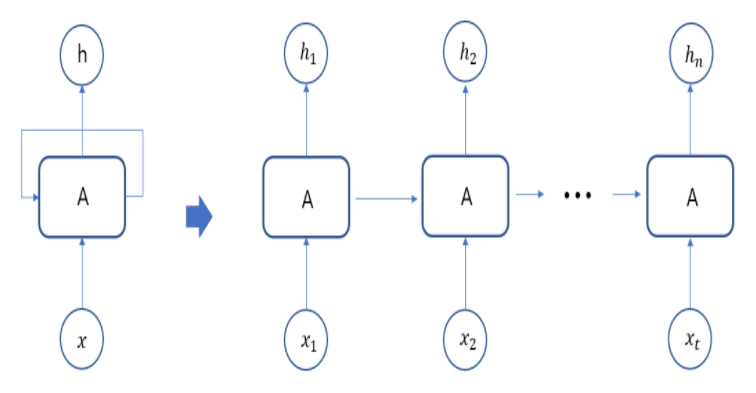

- 위의 그림에서, **x1에 대한 정보**는 **h1이라는 출력**뿐만 아니라 **다음 x2에 대한 정보와 같이 입력**이 되는 구조.
- 이 때, **A에 해당하는 부분을 LSTM과 GRU 등**을 사용하게 되는 것. **RNN은 순차적인 구조**이며 그 특징 때문에 **연산에 많은 시간**이 걸리게 되고, **네트워크의 고질적인 문제**인 ***역전파 소실 문제***가 발생.

### 2. LSTM

- 이제 LSTM이 RNN 구조에서 **특정 시점의 정보를 다음 시점으로 전달할 때 *얼만큼의 정보를 전달할 지 결정*하는 역할**을 하겠다는 것을 유추할 수 있음.
- LSTM의 가장 큰 특징 : **기존 RNN에 cell state를 추가**한 것. 
- **cell state**는 **입력들의 정보를 선별하여 다음 출력으로 내보내는 게이트 역할**을 함. 이 과정에서 **불필요한 정보들을 걸러내어 매끄러운 진행**이 가능하고 이로 인해 **역전파 소실 문제를 줄여** ***성능이 증가***. 
- LSTM은 상당히 복잡한 구조인데, 수식과 자세한 내용은 다음에서 확인 가능. 

(참고 : https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/)

### 3. GRU
- GRU는 LSTM의 **복잡한 구조를 보다 간결하게 보완**한 모델. LSTM의 장점을 가져오면서 **속도적인 부분을 개선**하여 더욱 빠른 속도로 비슷한 성능을 냄.

### 4. Attention
- Attention 매커니즘은 **RNN 모델의 구조적인 한계를 극복**한 모델.
- RNN 모델을 활용하여 **다음에 올 단어들을 예측**해서 **문장을 만드는 문제**라면, 다음 단어를 예측할 때 **입력으로 받는 정보**는?


> **지금까지 입력으로 집어넣었던 정보 모두 + 예측 이전 단어**

- 하지만 이런 경우 발생하는 **문제점**은 크게 다음의 **2가지**


1.   입력으로 이용된 정보들을 **순차적으로 고정 길이로 압축**하면서 발생하는 **정보의 손실**
2.   **역전파 소실**

- Attention 매커니즘은 이러한 2가지 문제를 해결하기 위해 노력했고, 다음과 같은 효과를 얻을 수 있음.



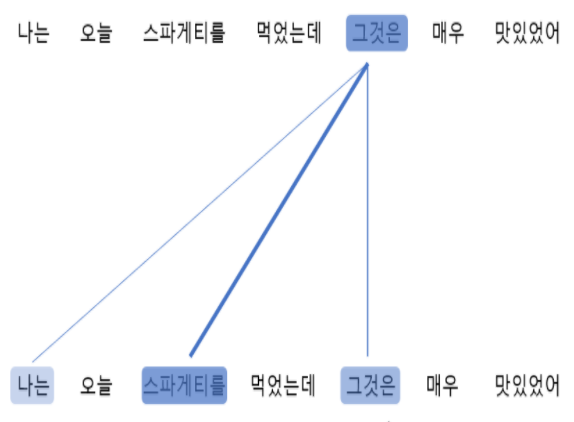

- "그것은"이 무엇을 가리키는지 찾기 위해 **Attention을 이용하면 어떤 토큰의 정보가 가장 큰 도움을 줬는지 알 수 있음**. 

> (참고 : http://blog.naver.com/PostView.nhn?blogId=ckdgus1433&logNo=221608376139&parentCategoryNo=&categoryNo=12&viewDate=&isShowPopularPosts=true&from=search)

- **Attention 매커니즘은 뒤이어 나온 자연어 처리의 세기적 발견인 <u>Transformer(attention is all you need)의 핵심 알고리즘</u>이며, 이 둘에 대한 이해가 바탕이 되어야 다양한 문제에서 SOTA(state-of-the-art)를 자랑하는 ELMO, BERT, GPT 등의 방법론들을 이해할 수 있음!!**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import os
os.getcwd()
os.chdir('drive/MyDrive/NLP/Dacon_NH competition/')

# 1. 형태소 분석 해놓은 데이터 로딩

In [ ]:
import pandas as pd

train = pd.read_csv('data/news_train_preprocessing_Mecab(all_alphabet).csv')
train.head()

,n_id,date,title,content,ord,info,new_article,text
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0,"['이데일리', 'MARKETPOINT', '현재', '코스닥', '기관', '억'...",이데일리 MARKETPOINT 현재 코스닥 기관 억 순매도
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1,"['실적', '기반', '저가', '에', '매집', '해야', '할', '월', ...",실적 기반 저가 에 매집 해야 할 월 급등 유망주 TOP 전격 공개
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1,"['하이스', '탁론', '선취', '수수료', '없', '는', '월', '최저'...",하이스 탁론 선취 수수료 없 는 월 최저 금리 상품 출시
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0,"['종합', '경제', '정보', '미디어', '이데일리', '무단', '전재', ...",종합 경제 정보 미디어 이데일리 무단 전재 재 배포 금지
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0,"['전국', '적', '인', '소비', '붐', '조성', '에', '기여', '...",전국 적 인 소비 붐 조성 에 기여 할 예정


In [ ]:
null_index = train[train['text'].isna()].index

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118745 entries, 0 to 118744
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   n_id         118745 non-null  object
 1   date         118745 non-null  int64 
 2   title        118745 non-null  object
 3   content      118745 non-null  object
 4   ord          118745 non-null  int64 
 5   info         118745 non-null  int64 
 6   new_article  118745 non-null  object
 7   text         118665 non-null  object
dtypes: int64(3), object(5)
memory usage: 7.2+ MB


In [ ]:
train = train.fillna('')

In [ ]:
train.iloc[null_index, 5].value_counts()    # text가 NaN값인 행의 'info' 정보 살펴보기

0    79
1     1
Name: info, dtype: int64

# 2. keras의 Tokenizer로 Vectorization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token_list = [t.split(' ') for t in train['text']]

def text2sequence(train_text, max_len=100):   # 여기 max_len에 가장 긴 문장의 길이를 넣기
  tokenizer = Tokenizer()                                   # keras의 vectorizing 함수 호출
  tokenizer.fit_on_texts(train_text)                        # train 문장에 fit
  train_X_seq = tokenizer.texts_to_sequences(train_text)    # 각 토큰들에 정수값 부여
  vocabulary = tokenizer.word_index
  vocab_size = len(tokenizer.word_index) + 1                # 모델에 알려줄 vocabulary의 크기 계산(padding값 0을 포함해야 하므로 +1)
  print('vocab_size : ', vocab_size)
  X_train = pad_sequences(train_X_seq, maxlen = max_len)    # 설정한 문장의 최대 길이만큼 padding

  return X_train, vocabulary, vocab_size, tokenizer

train_y = train['info']
train_X, vocabulary, vocab_size, vectorizer = text2sequence(token_list, max_len = 100)
print(train_X.shape, train_y.shape) 

vocab_size :  41725
(118745, 100) (118745,)


# 3. gensim word2vec으로 Embedding

In [ ]:
import numpy as np
import gensim

word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)
embedding_matrix = np.zeros((vocab_size, 300))     # 300차원의 임베딩 매트릭스 생성
cnt = 0

for index, word in enumerate(vocabulary):          # vocabulary에 있는 토큰들을 하나씩 넘김
  if word in word2vec:                             # 넘겨받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 의미)
    embedding_vector = word2vec[word]              # 해당 토큰에 해당하는 vector를 불러오고
    embedding_matrix[index] = embedding_vector     # 해당 위치의 embedding_matrix에 저장
  else:
    cnt += 1
    # print("word2vec에 없는 단어입니다.")
    continue

In [ ]:
print(cnt)

38906


# 4. Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
from tensorflow.keras import regularizers

max_len = 100

model = Sequential()
model.add(Embedding(vocab_size, 300, weights = [embedding_matrix], input_length = max_len))  # 임베딩 가중치 적용 코드
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
print(model.summary())

history = model.fit(train_X, train_y, epochs=5, batch_size=64, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          12517200  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,614,865
Trainable params: 12,614,865
Non-trainable params: 0
__________________________________________

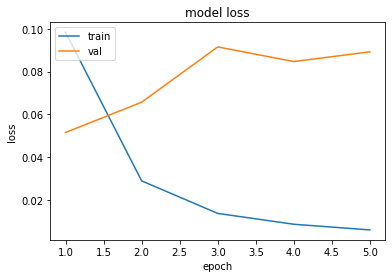

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 5. Train에 적용했던 형태소 분석기로 형태소 분석 해놓은 Test data에 적용

In [ ]:
test = pd.read_csv('data/news_test_preprocessing_Mecab(all_alphabet).csv')
test.head()

,n_id,date,title,content,ord,id,new_article,text
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1,"['마이크로LED', 'TV', '장비', '양산', '돌입', '전방', '업체'...",마이크로LED TV 장비 양산 돌입 전방 업체 투자 확대 로 본업 도 호조 연일 신고 가
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2,"['이데일리', '김대웅', '기자', '반도체장비', '업체', '코', '세스'...",이데일리 김대웅 기자 반도체장비 업체 코 세스 의 기술력 이 마이크로 발광다이오드 ...
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3,"['최근', '대형업체', '들', '과', '거래', '를', '맺', '고', ...",최근 대형업체 들 과 거래 를 맺 고 관련 장비 들 의 양산 에 돌입 하 면서 주가...
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4,"['TV', '를', '필두', '로', '올해', '부터', '마이크로LED', ...",TV 를 필두 로 올해 부터 마이크로LED 의 시대 가 본격 적 으로 개 화 할 것...
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5,"['코', '세스', '는', '반도체장비', '를', '제조', '판매', '하'...",코 세스 는 반도체장비 를 제조 판매 하 는 업체 로 지난 년 월 코스닥 시장 에 ...


In [ ]:
null_index_test = test[test['text'].isna()].index

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142565 entries, 0 to 142564
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   n_id         142565 non-null  object
 1   date         142565 non-null  int64 
 2   title        142565 non-null  object
 3   content      142565 non-null  object
 4   ord          142565 non-null  int64 
 5   id           142565 non-null  object
 6   new_article  142565 non-null  object
 7   text         142467 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.7+ MB


In [ ]:
test = test.fillna('')

In [ ]:
token_list_test = [t.split(' ') for t in test['text']]

test_X_seq = vectorizer.texts_to_sequences(token_list_test)    # 각 토큰들에 정수값 부여
X_test = pad_sequences(test_X_seq, maxlen = max_len)           # 설정한 문장의 최대 길이만큼 padding

print(X_test.shape) 

(142565, 100)


In [ ]:
submission_data = pd.read_csv('data/sample_submission.csv')

pred_test = model.predict(X_test)
submission_data.loc[:,'info'] = np.where(pred_test > 0.5, 1,0).reshape(-1)

In [ ]:
submission_data.iloc[null_index_test, -1].value_counts()

0    98
Name: info, dtype: int64

In [ ]:
submission_data.to_csv("submission_data_chan.csv", index = False)
submission_data

,id,info
0,NEWS00237_1,1
1,NEWS00237_2,0
2,NEWS00237_3,0
3,NEWS00237_4,0
4,NEWS00237_5,0
...,...,...
142560,NEWS09482_72,1
142561,NEWS09482_73,1
142562,NEWS09482_74,1
142563,NEWS09482_75,1
